# CA4

### Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### Reading data

In [39]:
df = pd.read_csv("./assets/train.csv", index_col = 0)

### Data exploration and visualisation

In [40]:
df.describe()

alpha         delta             u             g             r  \
count  80000.000000  80000.000000  79638.000000  80000.000000  80000.000000   
mean     177.579220     24.132590     21.961115     20.507677     19.647426   
std       96.409584     19.650113     35.581856     35.483302      1.855636   
min        0.005528    -18.785328  -9999.000000  -9999.000000      9.822070   
25%      127.643892      5.170723     20.353990     18.963188     18.135523   
50%      180.761747     23.603480     22.187965     21.101015     20.127550   
75%      233.815698     39.904905     23.698457     22.125007     21.047242   
max      359.999615     83.000519     32.781390     31.602240     29.571860   

                  i             z        run_ID  rerun_ID       cam_col  \
count  80000.000000  80000.000000  80000.000000   80000.0  80000.000000   
mean      19.085051     18.644640   4477.876713     301.0      3.511388   
std        1.757630     35.462189   1961.579187       0.0      1.589033   
min        9.469903  -9999.000000    109.000000     301.0      1.000000   
25%       17.732600     17.457503   3185.000000     301.0      2.000000   
50%       19.405635     19.004420   4188.000000     301.0      4.000000   
75%       20.401857     19.923013   5326.000000     301.0      5.000000   
max       32.141470     29.383740   8162.000000     301.0      6.000000   

           field_ID   spec_obj_ID      redshift         plate           MJD  \
count  80000.000000  8.000000e+04  80000.000000  80000.000000  80000.000000   
mean     185.663050  5.783094e+18      0.577219   5136.309963  55587.191400   
std      148.433559  3.327780e+18      0.731597   2955.646539   1809.144282   
min       11.000000  2.995801e+17     -0.009971    266.000000  51608.000000   
25%       82.000000  2.841535e+18      0.055160   2523.750000  54233.000000   
50%      146.000000  5.606066e+18      0.425051   4979.000000  55868.000000   
75%      240.000000  8.331746e+18      0.704777   7400.000000  56777.000000   
max      989.000000  1.412694e+19      7.011245  12547.000000  58932.000000   

           fiber_ID  
count  80000.000000  
mean     448.887437  
std      272.328619  
min        1.000000  
25%      221.000000  
50%      432.000000  
75%      644.000000  
max     1000.000000

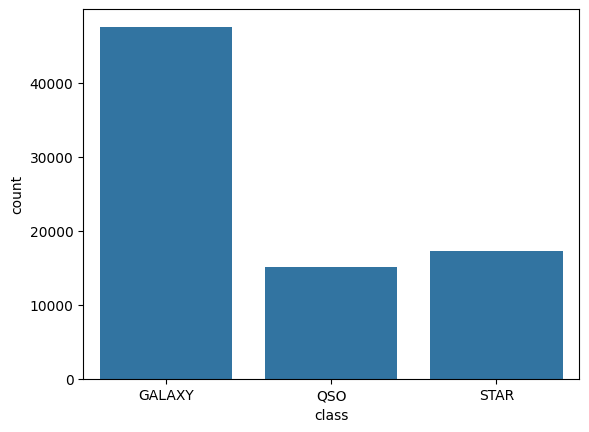

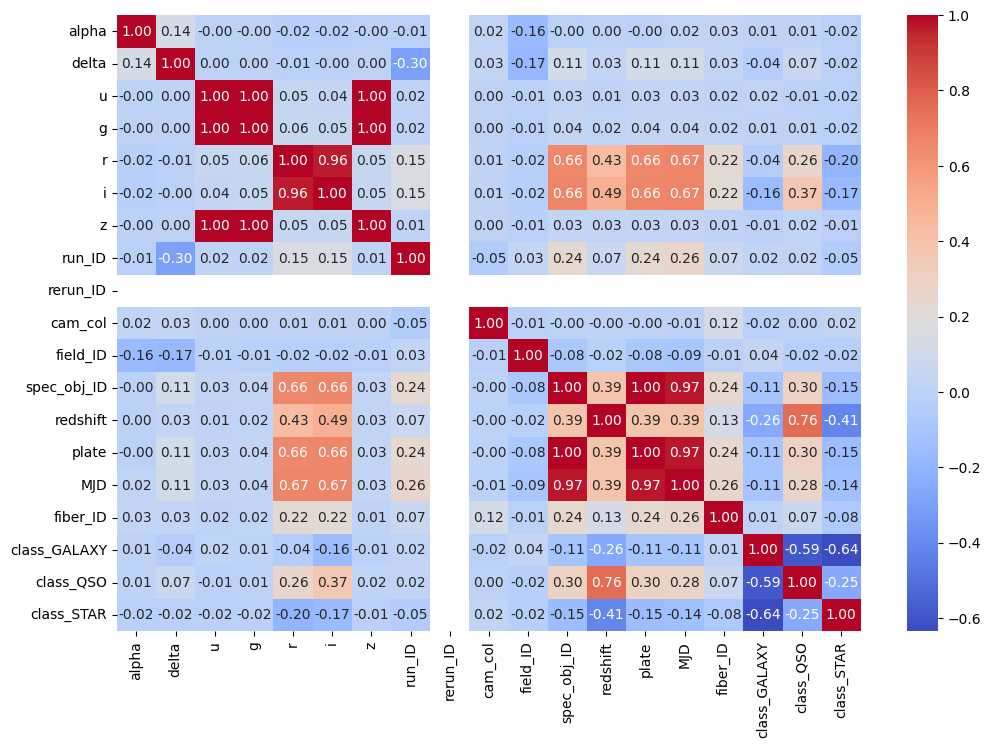

In [41]:
sns.countplot(x = df["class"])
plt.show()


# Doing classes to numbers, using onehotencoder since the class in nominal.
df_decoded = pd.get_dummies(df, columns = ["class"], dtype = int)

plt.figure(figsize=(12, 8))
sns.heatmap(df_decoded.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

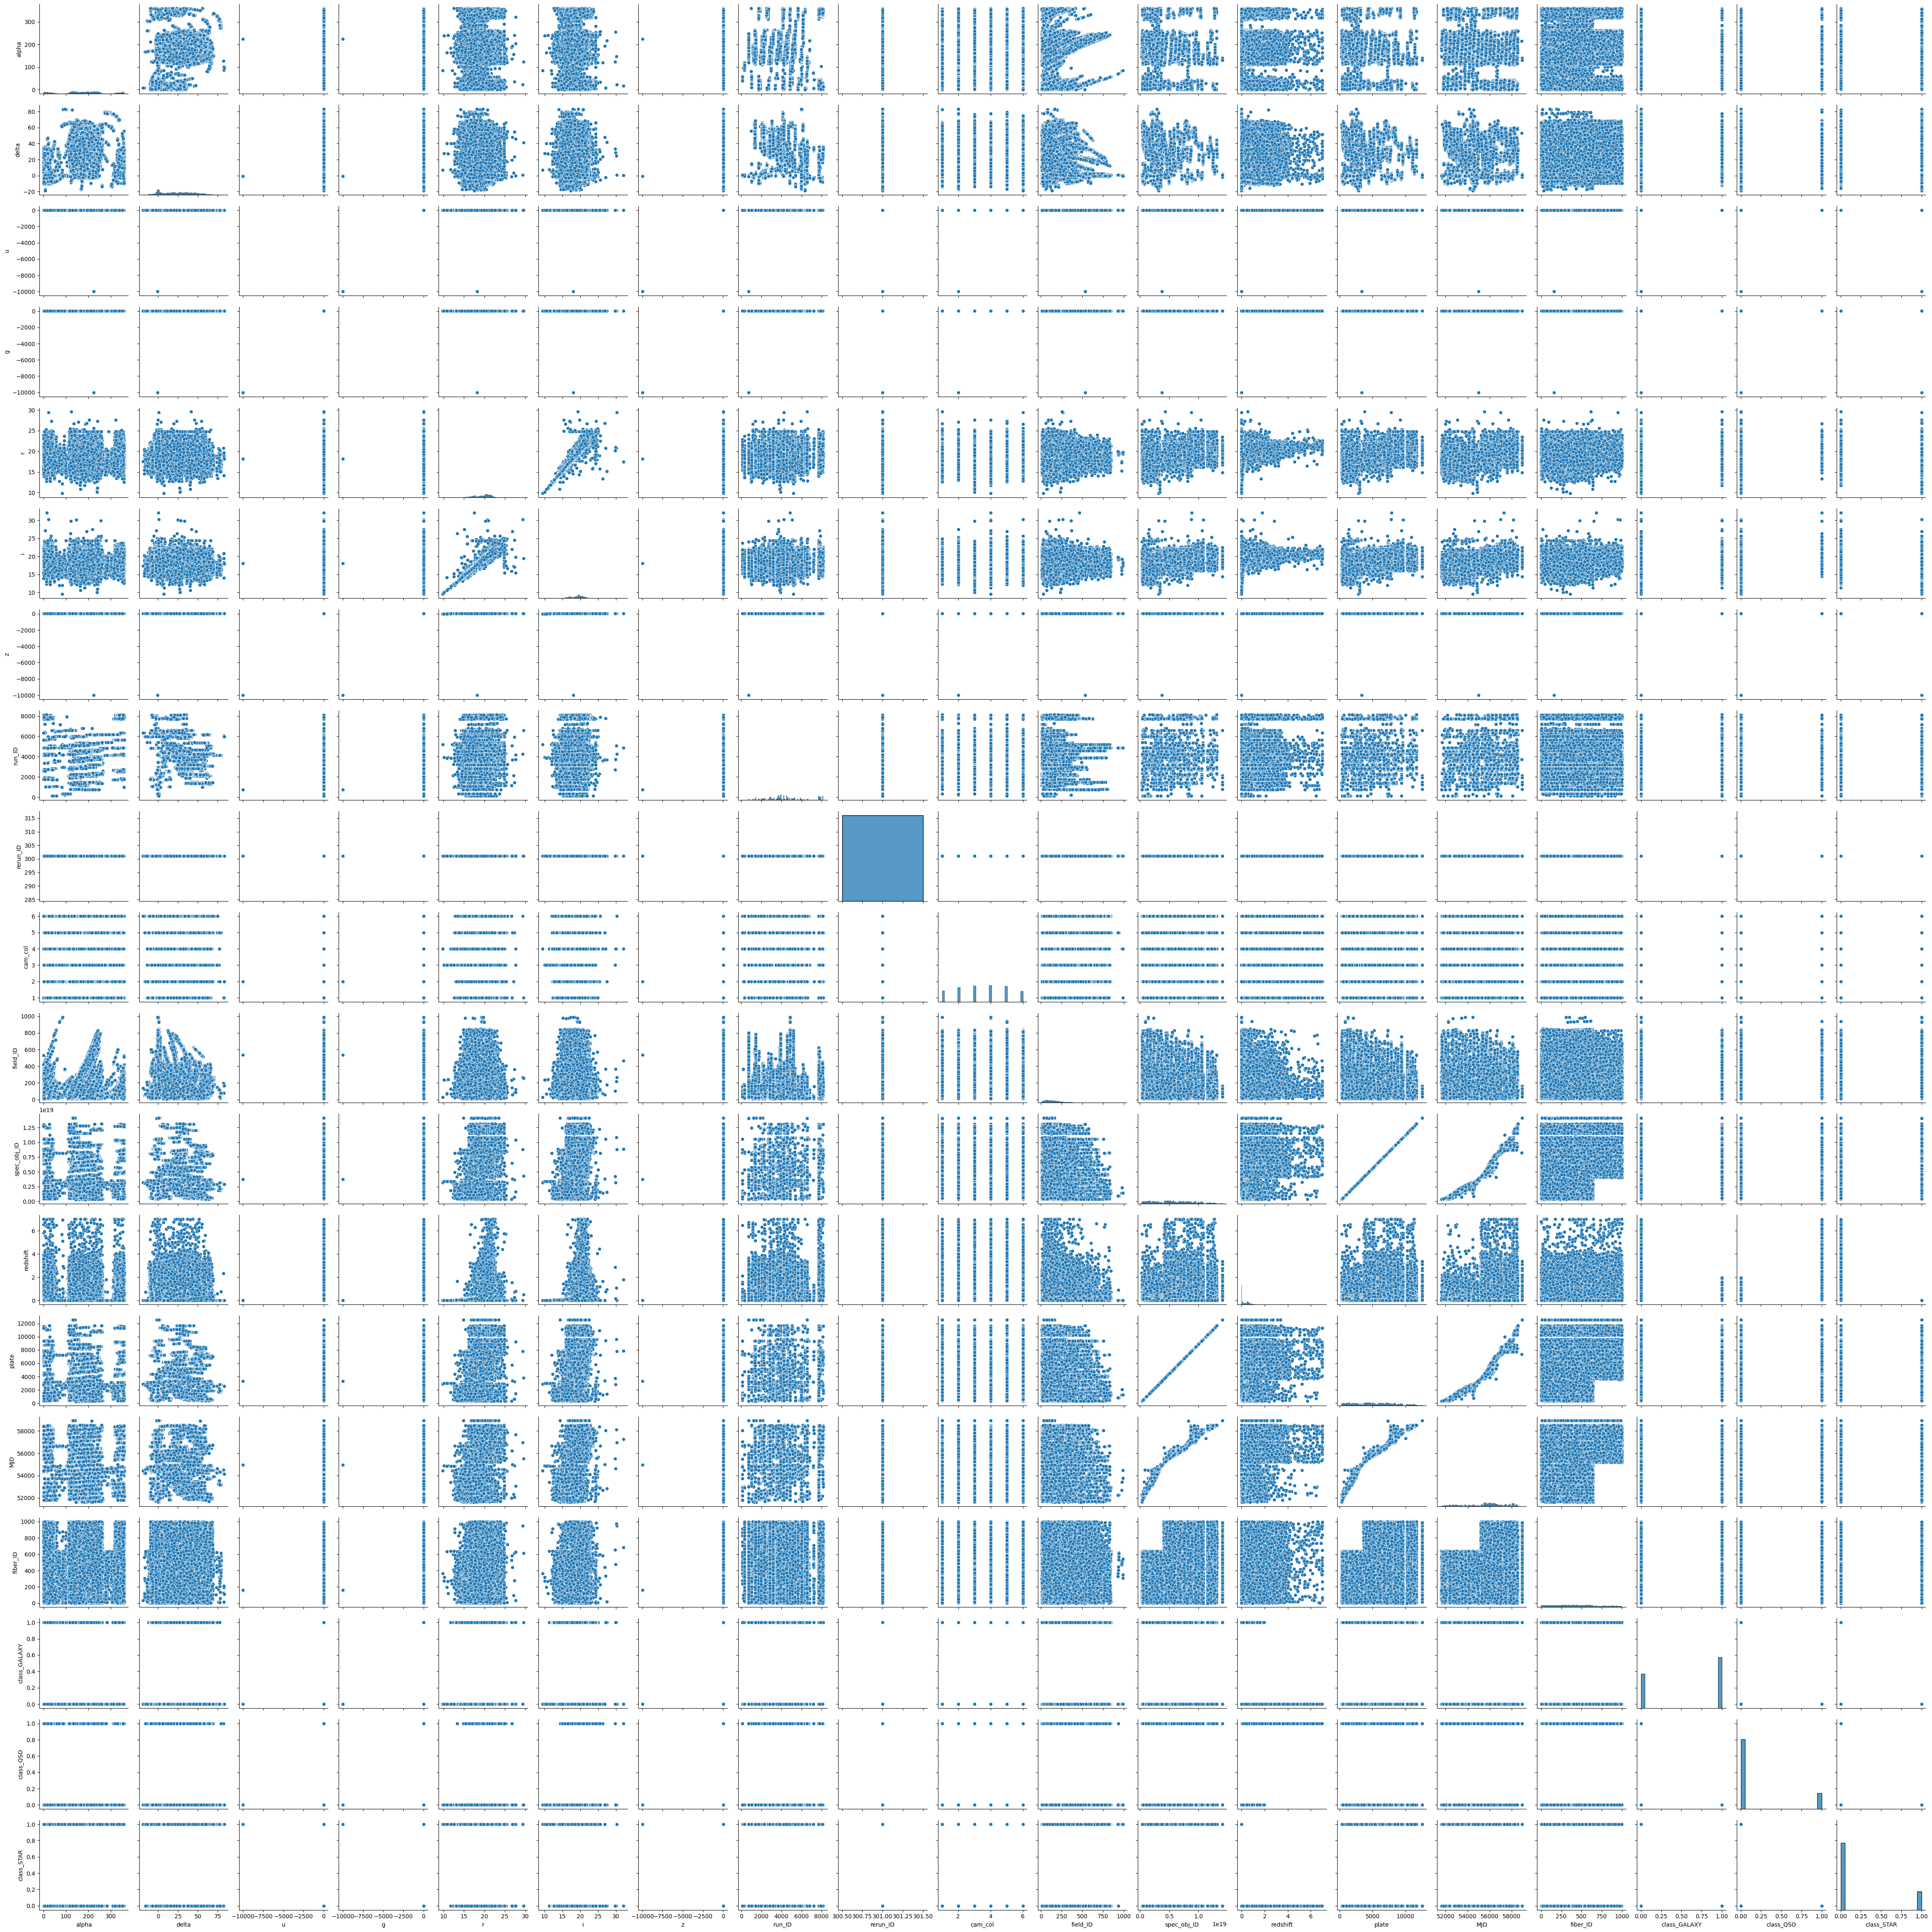

In [ ]:
# Pairplot to look closer to complex patterns
sns.pairplot(df_decoded)

##### Conclusion
We can see there is alot more galaxy data than the other stellar objects,  
we should therefore be carefull for potential bias.  
  
The data imbalance can also impact the model selection.  
Models like Logistic Regression, Decision Trees and even SVC might strugle.

The heatmap shows that there is alot complex correlation between the different features.  
However, there is a full positive correlation between u and z, g and z, g and u    
and a strong correlation between i and r.  
There is also strong negative correlation between the different classes.  


In [52]:
# Checking for missing values.
df_decoded.isnull().sum()

alpha           0
delta           0
u               0
g               0
r               0
i               0
z               0
run_ID          0
rerun_ID        0
cam_col         0
field_ID        0
spec_obj_ID     0
redshift        0
plate           0
MJD             0
fiber_ID        0
class_GALAXY    0
class_QSO       0
class_STAR      0
dtype: int64

### Data cleaning

In [53]:
# Dropping missing values
df_decoded = df_decoded.dropna()
print(df_decoded.isnull().sum())


alpha           0
delta           0
u               0
g               0
r               0
i               0
z               0
run_ID          0
rerun_ID        0
cam_col         0
field_ID        0
spec_obj_ID     0
redshift        0
plate           0
MJD             0
fiber_ID        0
class_GALAXY    0
class_QSO       0
class_STAR      0
dtype: int64


### Data preprocessing and visualisation

### Modelling

### Final evaluation

### Kaggle submission